In [1]:
import pandas as pd
import numpy as np
import datetime
from numpy import dtype

In [2]:
#rootname = "E:/PROJECTS/MLSNF/Data/CHEM/"
rootname = "U:/GWP/Groundwater/UMSS_Manti/Data/"
#rootname = "/media/p/5F5B-8FCB/PROJECTS/MLSNF/Data/CHEM/"

#Results

Import result data.

In [23]:
results = pd.read_csv(rootname+"AllResults.csv", parse_dates=[1,31])

In [25]:
results.drop([u'Unnamed: 0',u'SAMP_DESC', u'SITE_NAME'],inplace=True,axis=1)

In [26]:
switchStat =   {'UDOGM-02-11435':'UDOGM-03-9248', 'UDOGM-19-11903':'UDOGM-10-0037', 
                'UDOGM-19-11904':'UDOGM-10-0038', 'UDOGM-41-11816':'UDOGM-41-11817', 'UDOGM-24-10581':'UDOGM-24-10579', 
                'UDOGM-24-10497':'UDOGM-24-10501', 'UDOGM-24-10502':'UDOGM-24-10503',
                'UDOGM-02-11451':'UDOGM-03-9300', 'UDOGM-03-0016':'UDOGM-03-9300', 'UDOGM-02-11435':'UDOGM-03-9248', 
                'UDOGM-02-11787':'UDOGM-03-9405', 'UDOGM-03-9373':'UDOGM-02-11774', 'UDOGM-02-11777':'UDOGM-03-9384', 
                'UDOGM-02-11782':'UDOGM-03-9397', 'UDOGM-02-11786':'UDOGM-03-9404', 'UDOGM-02-11777':'UDOGM-03-9384', 
                'UDOGM-02-11775':'UDOGM-03-9374', 'UDOGM-02-11778':'UDOGM-03-9385', 'UDOGM-02-11772':'UDOGM-03-9371',
                'UDOGM-02-11691':'UDOGM-03-9348', 'UDOGM-02-11780':'UDOGM-03-9389', 'UDOGM-02-11785':'UDOGM-03-9400', 
                'UDOGM-02-11596':'UDOGM-03-9325', 'UDOGM-02-11788':'UDOGM-03-9409', 'UDOGM-24-10546':'USGS-385049111153101',
                'UDOGM-24-10545':'USGS-385045111171801', 'UDOGM-24-10578':'UDOGM-24-0055',
                'UDOGM-24-10579':'UDOGM-24-10581', 'UDOGM-24-10547':'USGS-385155111141801',
                'UDOGM-24-10492':'USGS-385209111171801', 'UDOGM-24-0019':'USGS-385224111142602',
                'UDOGM-24-10526':'USGS-385233111130301', 'UDOGM-24-10466':'USGS-385232111172701',
                'UDOGM-24-10528':'USGS-385249111130901', 'UDOGM-24-10474':'USGS-385249111132301',  
                'UDOGM-24-10543':'USGS-385300111153701', 'UDOGM-24-10529':'USGS-385303111131301',
                'UDOGM-24-10502':'UDOGM-24-10503', 'UDOGM-24-10473':'USGS-385400111122901',
                'UDOGM-24-10485':'USGS-385427111161201', 'UDOGM-24-10544':'USGS 385426111160801',
                'UDOGM-24-10484':'USGS 385554111152102', 'UDOGM-02-11766':'UDOGM-03-9361',
                'UDOGM-02-11450':'USGS-391751111130201', 'UDOGM-03-9292':'USGS-391751111130201',
                'UDOGM-02-11690':'UDOGM-03-9347', 'UDOGM-02-11597':'UDOGM-03-9326',
                'UDOGM-02-11449':'UDOGM-03-9291', 'UDOGM-02-11598':'UDOGM-03-9327',
                'UDOGM-02-11689':'UDOGM-03-9346', 'UDOGM-02-11599':'UDOGM-03-9328',
                'UDOGM-02-11457':'UDOGM-03-9312', 'UDOGM-02-11784':'UDOGM-03-9399',
                'UDOGM-02-11444':'UDOGM-03-9272', 'UDOGM-02-11456':'UDOGM-03-9310',
                'UDOGM-02-11443':'UDOGM-03-0060', 'UDOGM-02-11783':'UDOGM-03-9398',
                'UDOGM-02-11770':'UDOGM-03-9369', 'UDOGM-02-11453':'UDOGM-03-9307',
                'UDOGM-02-0004':'UTAHDWQ-4931020', 'UDOGM-02-11768':'UDOGM-03-9363',
                'UDOGM-02-11454':'UDOGM-03-9308', 'UDOGM-02-0006':'UTAHDWQ-4930730',
                'UDOGM-02-11630':'UDOGM-03-9330', 'UDOGM-02-11682':'UDOGM-03-9344',
                'UDOGM-02-11634':'UDOGM-03-9333', 'UDOGM-02-11439':'UDOGM-03-0058',
                'UDOGM-02-11440':'UDOGM-03-0059', 'UDOGM-02-11571':'UDOGM-03-9324',
                'UDOGM-03-9356':'UDOGM-03-9355', 'UDOGM-02-11769':'UDOGM-9366',
                'UDOGM-02-11633':'UDOGM-03-9332', 'UDOGM-02-11644':'UDOGM-03-9336',
                'UDOGM-02-11479':'UDOGM-04-0019', 'UDOGM-02-11536':'UDOGM-03-9322',
                'UDOGM-02-11535':'UDOGM-03-9321', 'UDOGM-02-11662':'UDOGM-03-9340',
                'UDOGM-02-11466':'UDOGM-03-9314', 'UDOGM-02-11674':'UDOGM-03-9343',
                'UDOGM-02-11632':'UDOGM-03-9331', 'UDOGM-02-11437':'UDOGM-03-9255',
                'UDOGM-02-11669':'UDOGM-03-9341', 'UDOGM-02-11478':'UDOGM-03-9315',
                'UDOGM-02-11483':'UDOGM-03-9317', 'UDOGM-02-11438':'UDOGM-03-9256',
                'UDOGM-02-11484':'UDOGM-03-9318', 'UDOGM-02-11648':'UDOGM-03-9339',
                'UDOGM-02-11767':'UDOGM-03-9362', 'UDOGM-02-11673':'UDOGM-03-9342',
                'UDOGM-02-11537':'UDOGM-03-9323', 'UDOGM-02-11569':'USGS-392210111094401',
                'UDOGM-04-0011':'USGS-392210111094401', 'UDOGM-02-11518':'UDOGM-04-0037',
                'UDOGM-02-11609':'UDOGM-04-10812', 'UDOGM-02-11659':'UDOGM-04-0067',
                'UDOGM-02-11610':'UDOGM-04-10813', 'UDOGM-04-11192':'UDOGM-02-11757',
                'UDOGM-04-11158':'UDOGM-04-0203', 'UDOGM-04-11171':'UDOGM-04-0205',
                'UDOGM-04-11170':'UDOGM-04-0204', 'UDOGM-04-10817':'UDOGM-02-11616',
                'UDOGM-02-11702':'UDOGM-04-10870', 'UDOGM-04-11174':'UDOGM-04-0234',
                'UDOGM-04-10869':'UDOGM-02-11667', 'UDOGM-04-10818':'UDOGM-02-11618',
                'UDOGM-04-10820':'UDOGM-02-11620', 'UDOGM-04-10866':'UDOGM-02-11663',
                'UDOGM-04-10874':'UDOGM-04-10873', 'UDOGM-04-11194':'UDOGM-04-0164',
                'UDOGM-04-11172':'UDOGM-04-0206', 'UDOGM-04-11176':'UDOGM-04-0208',
                'UDOGM-02-11661':'UDOGM-04-10865', 'UDOGM-02-11665':'UDOGM-04-10868',
                'UDOGM-06-0004':'UDOGM-05-0080', 'UDOGM-02-11660':'UDOGM-04-10864',
                'UDOGM-04-11178':'UDOGM-04-0210', 'UDOGM-04-11180':'UDOGM-04-0212',
                'UDOGM-04-11148':'UDOGM-04-11114', 'UDOGM-04-11181':'UDOGM-04-11147',
                'UDOGM-04-11191':'UDOGM-02-11756', 'UDOGM-04-11149':'UDOGM-04-0214',
                'UDOGM-04-11163':'UDOGM-04-0227', 'UDOGM-04-11162':'UDOGM-04-0226',
                'UDOGM-04-11165':'UDOGM-04-11131', 'UDOGM-04-11150':'UDOGM-04-0215',
                'UDOGM-04-11164':'UDOGM-04-0228', 'UDOGM-02-11605':'UDOGM-04-10810',
                'UDOGM-04-11159':'UDOGM-04-0223', 'UDOGM-04-11166':'UDOGM-04-0229',
                'UDOGM-04-11161':'UDOGM-04-0225', 'UDOGM-04-11160':'UDOGM-04-0224',
                'UDOGM-04-11157':'UDOGM-04-0222', 'UDOGM-04-11155':'UDOGM-04-0220',
                'UDOGM-04-11154':'UDOGM-04-0219', 'UDOGM-04-11152':'UDOGM-04-0217',
                'UDOGM-04-11167':'UDOGM-04-0230', 'UDOGM-04-11363':'UDOGM-04-11333',
                'UDOGM-04-11153':'UDOGM-04-0218', 'UDOGM-04-11046':'UDOGM-04-11002',
                'UDOGM-04-11151':'UDOGM-04-11151', 'UDOGM-04-11156':'UDOGM-04-0221',
                'UDOGM-04-11044':'UDOGM-04-11000', 'UDOGM-04-11045':'UDOGM-04-11001',
                'UDOGM-02-11542':'UDOGM-04-10776', 'UDOGM-04-11348':'UDOGM-04-11318',
                'UDOGM-02-11554':'UDOGM-04-10783', 'UDOGM-02-11563':'UDOGM-04-10793',
                'UDOGM-04-11342':'UDOGM-04-11312', 'UDOGM-04-11177':'UDOGM-04-0209',
                'UDOGM-02-11561':'UDOGM-04-10791', 'UDOGM-02-11558':'UDOGM-04-10788',
                'UDOGM-04-11168':'UDOGM-04-0231', 'UDOGM-04-0266':'UDOGM-04-0265',
                'UDOGM-04-11169':'UDOGM-04-0232', 'UDOGM-04-10784':'UDOGM-02-11555',
                'UDOGM-04-11005':'UDOGM-04-0201', 'UDOGM-04-11179':'UDOGM-04-0211',
                'UDOGM-04-11173':'UDOGM-04-0233', 'UDOGM-04-10823':'UDOGM-02-11626',
                'UDOGM-04-11058':'UDOGM-04-11012', 'UDOGM-04-10789':'UDOGM-02-11559',
                'UDOGM-04-11057':'UDOGM-04-11011', 'UDOGM-04-11055':'UDOGM-04-11009',
                'UDOGM-04-11054':'UDOGM-04-11008', 'UDOGM-04-11006':'UDOGM-04-0202',
                'UDOGM-04-11056':'UDOGM-04-11010', 'UDOGM-02-11541':'UDOGM-04-10775',
                'UDOGM-04-10785':'UDOGM-02-11556', 'UDOGM-04-11053':'UDOGM-04-11007',
                'UDOGM-04-11004':'UDOGM-04-0193', 'UDOGM-04-10822':'UDOGM-02-11625',
                'UDOGM-02-11714':'UDOGM-04-10882', 'UDOGM-02-11722':'UDOGM-04-10974',
                'UDOGM-04-10877':'UDOGM-02-11710', 'UDOGM-04-10973':'UDOGM-02-11720',
                'UDOGM-04-10821':'UDOGM-02-11621', 'UDOGM-04-10972':'UDOGM-02-11719',
                'UDOGM-04-11349':'UDOGM-04-11319', 'UDOGM-02-11713':'UDOGM-04-10881',
                'UDOGM-04-10971':'UDOGM-02-11718', 'UDOGM-04-10787':'UDOGM-02-11557',
                'UDOGM-08-11384':'UDOGM-16-9768', 'UDOGM-08-11378':'UDOGM-08-11372',
                'UDOGM-05-0032':'USGS-392644111061701', 'UDOGM-08-11379':'UDOGM-08-11373',
                'UDOGM-08-11380':'UDOGM-08-11374', 'UDOGM-04-10953':'UDOGM-08-11374',
                'UDOGM-08-11381':'UDOGM-08-11375', 'UDOGM-08-11382':'UDOGM-08-11376',
                'UDOGM-04-11299':'UDOGM-08-11416', 'UDOGM-23-10374':'USGS-392750111050401',
                'UDOGM-08-0039':'UDOGM-04-11197', 'UDOGM-23-10371':'USGS-392818111064801',
                'UDOGM-23-10370':'USGS-392834111063001', 'UDOGM-16-9752':'UDOGM-16-0056', 
                'UDOGM-08-0025':'USGS-392917111131601', 'UDOGM-16-0035':'USGS-393151111041301', 
                'UDOGM-16-0036':'USGS-393154111041401', 'UDOGM-16-0025':'USGS-393148111044001', 
                'UDOGM-16-9766':'USGS-393247111065501', 'UDOGM-16-9767':'USGS-393247111065501', 
                'UDOGM-16-9760':'UDOGM-16-9761', 'UDOGM-35-9133':'UDOGM-35-9131', 
                'UDOGM-21-0026':'UDOGM-22-0009', 'UDOGM-21-0037':'UTAHDWQ-4933070', 'UDOGM-22-0005':'UTAHDWQ-4933070',
                'UDOGM-22-0023':'UTAHDWQ-5931590', 'UDOGM-21-0039':'UTAHDWQ-5931590',
                'UDOGM-21-0015':'UDOGM-22-0022', 'UDOGM-21-0005':'USGS-394103111091602',
                'UDOGM-29-10699':'UDOGM-29-0016', 'UDOGM-15-0025':'UDOGM-10-0025',
                'UDOGM-42-0020':'USGS-394424111090501', 'UTAHDWQ-5931500':'USGS-394424111090501',
                'UDOGM-10-0016':'UDOGM-15-0023', 'UDOGM-15-0031':'UDOGM-10-0006',
                'UTAHDWQ-4931140':'USGS-391634111170001', 'UTAHDWQ-4955460':'USGS-384845111195101',
                'UTAHDWQ-4955300':'USGS-09332100', 'UTAHDWQ-4955320':'USGS-384846111121701',
                'UTAHDWQ-4955423':'USGS-385236111172901', 'UTAHDWQ-4955570':'USGS-385715111121601',
                'UTAHDWQ-4930590':'USGS-392455111070000', 'USGS-391745111403101':'USGS-391750111402501'}
def statget(x):
    statMatch = list(switchStat.keys())
    if x in statMatch:
        return switchStat.get(x)
    else:
        return x

In [27]:
ParUnAbb = {'Alk':u'mg/L', 'As':u'\u03BCg/L', 'Ca':u'mg/L', 'Cl':u'mg/L', 'CO2':u'mg/L', 'CO3':u'mg/L', 'Cond':u'\u03BChoms/cm',
           'Cu':u'\u03BCg/L', 'DO':u'mg/L', 'Hard':u'mg/L', 'HCO3':u'mg/L', 'K':u'mg/L', 'Mg':u'mg/L', 'N':u'mg/L', 'pH':u'', 
            'Q':u'gpm', 'Fe':u'\u03BCg/L', 'TDS':u'mg/L', 'Si':u'mg/L', 'SO4':u'mg/L', 'Temp':u'\N{DEGREE SIGN}C', 'PO4':u'mg/L', 'TSS':u'mg/L',
           'Turb':u'Turb. Units', 'Na':u'mg/L', 'NaK':u'mg/L', 'NO3':u'mg/L', 'NH3':u'mg/L', 'NO2':u'mg/L', 'NH3_N':u'mg/L'}

In [28]:
results['StationId'] = results['StationId'].apply(lambda x: statget(x),1)

In [29]:
results.dtypes

AnalysisDate       object
AnalytMeth         object
AnalytMethId       object
DetectCond         object
LabComments        object
LabName            object
LimitType          object
MDL               float64
MDLUnit            object
MethodDescript     object
OrgId              object
OrgName            object
Param              object
ProjectId          object
QualCode          float64
ResultComment      object
ResultStatus       object
ResultValue       float64
SampComment        object
SampDepth         float64
SampDepthRef       object
SampDepthU         object
SampEquip          object
SampFrac           object
SampMedia          object
SampMeth           object
SampMethName       object
SampType           object
SampleDate         object
SampleId           object
StationId          object
Unit               object
ParAbb             object
dtype: object

#Stations

In [124]:
station = pd.read_csv(rootname + 'AllStationsRev.txt')

In [125]:
station['StationId'] = station['StationId'].apply(lambda x: statget(x),1)

In [126]:
len(station)

4352

In [127]:
station.drop_duplicates(subset=['StationId'],inplace=True)

In [128]:
station.reset_index(inplace=True)
station.set_index(['StationId'],inplace=True)

In [129]:
fmdict = {"Blackhawk Formation of Mesaverde Group":4, "Castlegate Sandstone of Mesaverde Group":5, 
          "Ferron Sandstone Member of Mancos Shale":2, "Flagstaff Limestone (Eocene-Paleocene)":8, 
          "Green River Formation":10, "Mancos Shale":1, "North Horn Formation (Paleocene-Upper Cretaceous)":7,
          "Paleozoic Erathem":0, "Price River Formation of Mesaverde Group":6,
          "Star Point Sandstone of Mesaverde Group":3, "Valley Fill":9}

In [130]:
station['FmNum'] = station['FmType'].apply(lambda x: fmdict.get(x),1)

In [131]:
len(station)

4137

#Summarize and Plot Data

In [132]:
import matplotlib.pyplot as plt
from pylab import rcParams, rc
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

rcParams['figure.figsize'] = 15, 10

In [133]:
durationsummary = results.groupby(['StationId','Param'])['SampleDate'].agg([np.min,np.max,np.size]).reset_index()
durationsummary.convert_objects(convert_numeric=True)
print list(durationsummary.columns)
durationsummary['amax'] =  durationsummary['amax'].apply(lambda x: str(x).replace('nan','00:00:00'),1)
durationsummary['amin'] =  durationsummary['amin'].apply(lambda x: str(x).replace('nan','00:00:00'),1)
durationsummary['duration'] = durationsummary['amax'].astype(np.datetime64) - durationsummary['amin'].astype(np.datetime64)

['StationId', 'Param', 'amin', 'amax', 'size']


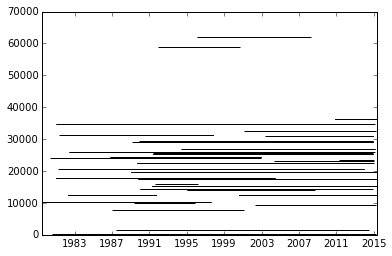

In [137]:
durationsummary.drop_duplicates(subset=['StationId'],inplace=True)
LongFlow = durationsummary[(durationsummary['Param']=='Flow') & (durationsummary['size']>50) & 
                           (durationsummary['duration']>365*5)]
LongFlow.amax = LongFlow.amax.astype(np.datetime64)
LongFlow.amin = LongFlow.amin.astype(np.datetime64)

y = LongFlow.index.values
x2 = LongFlow.amax.values
x1 = LongFlow.amin.values

plt.figure()
# Plot a line for every line of data in your file
plt.hlines(y, x1, x2)
plt.show()

In [136]:
durationsummary.to_csv(rootname + "fieldsummaries.csv")

In [195]:
LongFlowList = list(LongFlow['StationId'].values)
FlowResGPM = results[(results['StationId'].isin(LongFlowList)) & (results['ResultValue'] != np.nan)]
FlowResGPM = FlowResGPM[FlowResGPM.Unit.isin(['ft3/sec', 'cfs       ', 'mgd', 'mgd       ', 'GPM', 'GPD', 'CFS', 'MGD'])]

In [193]:
def flowconv(x):
    x[1] = str(x[1]).rstrip().lower()
    if x[1] in ['mgd']:
        return x[0]*1.8581441079
    elif x[1] in ['gallons per minute','gpm']:
        return x[0]*0.00222800926
    elif x[1] in ['gpd']:
        return x[0]*1.54722865E-6
    elif x[1] in ['ft3/sec', 'cfs']:
        return x[0]
    else:
        return np.nan
    
def unitconv(x):
    x = str(x).rstrip().lower()
    if x in ['mgd','gpm','gpd','cfs','ft3/sec','gallons per min']:
        return 'cfs'
    else:
        return np.nan

In [196]:
FlowResGPM['ResultValue'] = FlowResGPM[['ResultValue','Unit']].apply(lambda x: flowconv(x),1)
FlowResGPM['Unit'] = FlowResGPM['Unit'].apply(lambda x: unitconv(x),1)

In [197]:
FlowResGPM['SampleDate'] = FlowResGPM['SampleDate'].astype(np.datetime64)
FlowResGPM.reset_index(inplace=True)
FlowResGPM.set_index(['SampleDate'],inplace=True)
FlowResGPM.sort_index(inplace=True)
FlowResGPM['pyDate'] = FlowResGPM.index.to_pydatetime()
FlowResGPM['JulDate'] = FlowResGPM.index.to_julian_date()
FlowGPM = pd.merge(FlowResGPM, station, left_on='StationId', right_index=True, how='left')

In [198]:
centsta = FlowGPM[FlowGPM['StationNam']=='CENTENNIAL; UTG040008-002']
centsta[['ResultValue','Unit']]

,ResultValue,Unit
SampleDate,,
1989-10-01 18:00:00,0.000000,cfs
1989-11-01 18:00:00,0.000000,cfs
1989-12-01 19:00:00,0.000000,cfs
1990-01-01 19:00:00,0.000000,cfs
1990-02-01 19:00:00,0.000000,cfs
1990-03-01 19:00:00,0.000000,cfs
1990-04-01 18:00:00,0.000000,cfs
1990-05-01 18:00:00,0.000000,cfs
1990-06-01 18:00:00,0.000000,cfs


In [199]:
pdf = PdfPages(rootname+'flowres.pdf')

xmax = np.max(FlowResGPM['pyDate'].values)
xmin = np.min(FlowResGPM['pyDate'].values)

from pylab import rcParams
rcParams.update({'font.size': 10})

for key, grp in FlowGPM.groupby(['StationId']):
    if np.max(grp['ResultValue'])>0:
        # determine gallons flowing for each time period
        grp['Gallons'] = grp['ResultValue'] * grp['JulDate'].diff()*60*60*24*2.29568411E-5 
        y2 = grp['Gallons'].cumsum().values
        # filter out graphs smaller than 30 non-zero points
        if np.count_nonzero(grp['ResultValue']) > 5:
            fig = plt.figure(figsize=(10,8))
            title = str(str(grp['StationNam'].values[0]) + ' ' + str(grp['StationTyp'].values[0]))
            if title == "nan nan":
                plt.title(key)
            else:
                plt.title(title)

            ax = fig.add_subplot(111)
            ax.plot(grp['pyDate'].values,grp['ResultValue'].values, label='Discharge', linestyle='-', marker='.', color='b')
            ax.set_ylabel('Discharge (cfs)')
            ax.set_xlabel('Date')
            ax.set_xlim([xmin,xmax])

            ax2 = ax.twinx()
            ax2.plot(grp['pyDate'].values, y2, label='Cumulative Discharge', linestyle='--', color='g')
            ax2.set_ylabel('Cumulative Discharge (ac-ft)')


            # ask matplotlib for the plotted objects and their labels
            lines, labels = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(-0.10, 1.15))
            ax2.set_xlim([xmin,xmax])
            #plt.tight_layout()
            pdf.savefig(fig)
            plt.close()
    


d = pdf.infodict()
d['Title'] = 'Discharge Data'
d['Author'] = u'Paul Inkenbrandt'
d['Subject'] = 'Discharge Data from Manti LaSal'
d['Keywords'] = 'PdfPages multipage keywords author title subject'
d['CreationDate'] = datetime.datetime.today()
d['ModDate'] = datetime.datetime.today()
pdf.close()

C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#Pivot Data

Drop rows from the `results` table that have null `SampleId` values or parameter abbreviations.

In [ ]:
results.dropna(subset=['SampleId','ParAbb'],how='any', inplace=True)

Drop rows from the `results` table that have a detection condition (ex. "not detected").  This eliminates nondetects, which will inhereantly bias the data, as it is not considering values below the detection levels.

In [ ]:
results = results[pd.isnull(results['DetectCond'])]

Drop rows from the `results` table that have duplicate `SampleId` values and parameters (chemical concentrations, field measurements). The `SampleId` field will be the index for the pivoted table.  Each row in the pivoted table will represent an individual water sample.  The `SampleId` is applied to each parameter that comes from the same water sample.  For example, if I go out to a stream and fill a water bottle and have that analyzed for 4 different parameters (i.e. calcium, magnesium, sodium, and chloride), then each result from the analysis of that water will have the same `SampleId`.  Sometimes we sample a station multiple times, so one `StationId` can have many `SampleId` values. 

In [ ]:
results.drop_duplicates(subset=['SampleId','ParAbb'],inplace=True)

Select results that have more than 50 flow values to plot flow change over time.
http://stackoverflow.com/questions/17926273/how-to-count-distinct-values-in-a-column-of-a-pandas-group-by-object

In [ ]:
def condfix(x):
    if x[1]=='Cond':
        if x[2]=='mS/cm':
            return x[0]/1000
        else:
            return x[0]
    else:
        return x[0]
    
def condunitfix(x):
    if x[1]=='Cond':
        if x[0]=='mS/cm':
            return 'uS/cm'
        else:
            return 'uS/cm'
    else:
        return x[0]

def pHfix(x):
    if x[1] == 'pH':
        if x[0] == 0.0:
            return np.nan
        elif x[0] >= 14.0:
            return np.nan
        else:
            return x[0]
    else:
        return x[0]
        
    

In [ ]:
results['ResultValue'] = results[['ResultValue','ParAbb','Unit']].apply(lambda x: condfix(x),1)
results['Unit'] = results[['Unit','ParAbb']].apply(lambda x: condunitfix(x),1)

In [ ]:
results['ResultValue'] = results[['ResultValue','ParAbb']].apply(lambda x: pHfix(x),1)

Summarize All Fields by date and count

Pivot the data so that parameters are now columns.  

In [ ]:
datap = results.pivot(index='SampleId', columns='ParAbb', values='ResultValue')

Drop columns from the pivot table that are pretty much empty.

In [ ]:
datap.dropna(subset=['SO4','Cond','Temp','TDS','pH'],how='all',inplace=True)

The table lost the `StationId` field when it was pivoted, so now we need to add the `StationId` field back on to the table by joining it to the previous results table using the `SampleId` field.  First we parse down the results table to only the information we want to retain, then we join the tables.

In [ ]:
resdrop = ['AnalysisDate', 'AnalytMeth', 'AnalytMethId',
             'DetectCond', 'LabComments', 'LabName', 'LimitType',
             'MDL', 'MDLUnit', 'MethodDescript',
             'OrgId', 'OrgName', 'Param', 'ProjectId',
             'QualCode', 'ResultComment', 'ResultStatus', 'ResultValue',
             'SampComment', 'SampDepth',
             'SampDepthRef', 'SampDepthU', 'SampEquip', 'SampFrac',
             'SampMedia', 'SampMeth', 'SampMethName', 'SampType',
             'Unit', 'ParAbb']
resPivot = results.drop(resdrop, axis=1)

In [ ]:
datapiv = pd.merge(datap, resPivot, left_index=True, right_on='SampleId',how='left')

Now that we have a `StationId` field, we can add our station data, but only the data that will be useful for plotting our data.

In [ ]:
pivStats = station.drop(['Aquifer', 'ConstDate', 'Depth', 'DepthUnit',
                         'HoleDUnit', 'HoleDepth', 
                         'OrgId', 'StationComment', 'StationName', 'matchid'], axis=1)

In [ ]:
datapiv = pd.merge(datapiv, pivStats, left_on='StationId', right_index=True,how='left')

In [ ]:
datapiv.drop_duplicates(inplace=True)

In [ ]:
#datapiv.to_csv(rootname+"AllResultsPivot.csv", chunksize=10000)

#Create Table For Plotting

In [ ]:
piperdata = datapiv.dropna(subset = ['Ca','Na','Cl','K','Mg','SO4'],how='any')

Find Relationship between Bicarbonate and Alkalinity.  Fill in missing bicarbonate values.

In [ ]:
from scipy.stats import linregress

In [ ]:
piv = piperdata.ix[:,['Alk','HCO3']]
piv = piv[(piv.Alk < 5000)&(piv.HCO3 < 5000)]
piv = piv[(piv.Alk > 0)&(piv.HCO3 > 0)]
piv.dropna(inplace=True)
lin = linregress(piv.Alk.values,piv.HCO3.values)
print lin
piperdata.ix[:,"HCO3"] = piperdata.apply(lambda x: x['Alk']*lin[0]+lin[1] if np.isnan(x['HCO3']) else x['HCO3'],1)

In [ ]:
piperdata = piperdata.drop(['Alk','As','CO2','Cu','DO','NaK','PO4'], axis=1)

In [ ]:
piperdata.dropna(subset=['Lat_Y','HCO3'], how='any', inplace=True)

In [ ]:
piperdata = pd.merge(piperdata, StatFreq, on='StationId', how='left')

In [ ]:
d = {'Ca':0.04990269, 'Mg':0.082287595, 'Na':0.043497608, 'K':0.02557656, 'Cl':0.028206596, 
     'HCO3':0.016388838, 'CO3':0.033328223, 'SO4':0.020833333, 'NO2':0.021736513, 'NO3':0.016129032}
parList = ['Ca','Mg','Na','K','Cl','HCO3','SO4']


def CO3zero(x):
    if (np.isnan(x)):
        return 0.0
    else:
        return x

def chrgbal(x):
    cation = (x[0]*d['Na'] + x[1]*d['K'] + x[2]*d['Mg'] + x[3]*d['Ca'])
    anion = (x[4]*d['Cl'] + x[5]*d['HCO3'] + x[6]*d['CO3'] + x[7]*d['SO4']) 
    return  (cation - anion)/(cation+anion)*100

In [ ]:
piperdata['CO3'] = piperdata['CO3'].apply(lambda x: CO3zero(x),1)
piperdata['chrgbal'] = piperdata[['Na','K','Mg','Ca','Cl','HCO3','CO3','SO4']].apply(lambda x: chrgbal(x),1)

In [ ]:
for par in parList:
    piperdata[par+"_mql"] = piperdata[par].apply(lambda x: x*d[par],1)

In [ ]:
piperdata = piperdata[abs(piperdata['chrgbal']) < 5.0]

In [ ]:
piperdata.to_csv(rootname+"PiperData.csv")

In [ ]:
piperdata.groupby('FmType')['Mg_mql'].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()

In [ ]:
print piperdata.groupby('FmType')['StationId'].nunique()
piperdata.groupby('StationType')['StationId'].nunique()

In [ ]:
names = list(set(list(piperdata.columns)) - set(['SampleDate', 'SampleId', 'StationId', 'FmType', 'Lat_Y', 
                                          'Lon_X', 'OrgName', 'StationType','DEM','HorCollMet','PLSS','USGSCAD',
                                              'UNITNAME', 'Elev', 'MAP_UNIT_SYMBOL', u'HUC_12', u'HUC_10',
                                              'Depth', u'OBJECTID', u'ElevUnit',u'HU_12_NAME',u'HU_10_NAME', u'FmNum']))

In [ ]:
Forms = pd.DataFrame(fmdict.items(),columns=['FmType','FmNum'] )

In [ ]:
?pd.merge

In [ ]:
names = list(set(list(piperdata.columns)) - set(['SampleDate', 'SampleId', 'StationId', 'FmType', 'Lat_Y', 
                                          'Lon_X', 'OrgName', 'StationType','DEM','HorCollMet','PLSS','USGSCAD',
                                              'UNITNAME', 'Elev', 'MAP_UNIT_SYMBOL', u'HUC_12', u'HUC_10',
                                              'Depth', u'OBJECTID', u'ElevUnit',u'HU_12_NAME',u'HU_10_NAME', u'FmNum',
                                                'count_nonzero','chrgbal']))
print names

rc('font', family='Arial')
pdf = PdfPages(rootname+'pipergeoboxes.pdf')
j = {}

for i in range(len(names)):
    fms = piperdata[[names[i],'FmNum','FmType']]
    fms.dropna(inplace=True)
    fms = fms[~fms['FmType'].isin([' ','', np.nan, 'Green River Formation', 'Rock Springs Formation of Mesaverde Group', 
                                   'Holocene Alluvium', 'Masuk Member of Mancos Shale', 
                                   'Tununk Shale Member of Mancos Shale', 'Blue Gate Shale Member of Mancos Shale', 
                                   'Emery Sandstone Member of Mancos Shale', 'Pleistocene Series', 
                             'Paleozoic Erathem', 'Mancos Shale'])]
    if len(fms)>30:
        j[names[i]] = fms.groupby('FmNum')[names[i]].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()
        j[names[i]] = pd.merge(j[names[i]],Forms, left_on='FmNum', right_on='FmNum',how='left')
        labs = [str(j[names[i]]['FmType'][b]) + " (n=" + str(int(j[names[i]]['size'][b])) + ")" for b in range(len(j[names[i]][va]))]
        tickloc = [b+1 for b in range(len(j[names[i]][va]))]
        ax = fms.boxplot(column=names[i], by='FmNum', vert=False)
        try:
            plt.title(ParAbb.keys()[ParAbb.values().index(names[i])])
        except(ValueError):
            plt.title(names[i])
        plt.suptitle('')
        plt.yticks(tickloc, labs)
        fig = ax.get_figure()
        if ParUnAbb.get(names[i],'') == '':
            units = names[i]
        else:
            units = u'%s (%s)'%(names[i],ParUnAbb.get(names[i]))
        plt.xlabel(units)     
        if np.max(fms[names[i]].values) > 100:
            plt.xscale('log')  
        plt.tight_layout()      
        pdf.savefig(fig)
        plt.close()
pdf.close()
parsum = pd.concat(j)
parsum.to_csv(rootname + "geology_stats.csv")

In [ ]:
names = list(set(list(piperdata.columns)) - set(['SampleDate', 'SampleId', 'StationId', 'FmType', 'Lat_Y', 
                                          'Lon_X', 'OrgName', 'StationType','DEM','HorCollMet','PLSS','USGSCAD',
                                              'UNITNAME', 'Elev', 'MAP_UNIT_SYMBOL', u'HUC_12', u'HUC_10',
                                              'Depth', u'OBJECTID', u'ElevUnit',u'HU_12_NAME',u'HU_10_NAME', 
                                                 u'FmNum', u'FmNum',
                                                'count_nonzero','chrgbal']))
print names

pipersprings = piperdata[piperdata['StationType']=='Spring']

rc('font', family='Arial')
pdf = PdfPages(rootname+'piperspringsgeoboxes.pdf')
j = {}

for i in range(len(names)):
    fms = pipersprings[[names[i],'FmNum']]
    fms.dropna(inplace=True)
    fms = fms[~fms[va].isin([' ','', np.nan, 'Green River Formation', 'Rock Springs Formation of Mesaverde Group', 
                                   'Holocene Alluvium', 'Masuk Member of Mancos Shale', 
                                   'Tununk Shale Member of Mancos Shale', 'Blue Gate Shale Member of Mancos Shale', 
                                   'Emery Sandstone Member of Mancos Shale', 'Pleistocene Series', 'Paleozoic Erathem',
                             'Mancos Shale', 'Ferron Sandstone Member of Mancos Shale'])]
    if len(fms)>30:
        j[names[i]] = fms.groupby('FmNum')[names[i]].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()
        j[names[i]] = pd.merge(j[names[i]],Forms, left_on='FmNum', right_on='FmNum',how='left')
        labs = [str(j[names[i]]['FmType'][b]) + " (n=" + str(int(j[names[i]]['size'][b])) + ")" for b in range(len(j[names[i]][va]))]
        tickloc = [b+1 for b in range(len(j[names[i]][va]))]
        ax = fms.boxplot(column=names[i], by='FmNum', vert=False)
        try:
            plt.title(ParAbb.keys()[ParAbb.values().index(names[i])])
        except(ValueError):
            plt.title(names[i])
        plt.suptitle('')
        plt.yticks(tickloc, labs)
        fig = ax.get_figure()
        if ParUnAbb.get(names[i],'') == '':
            units = names[i]
        else:
            units = u'%s (%s)'%(names[i],ParUnAbb.get(names[i]))
        plt.xlabel(units)     
        if np.max(fms[names[i]].values) > 100:
            plt.xscale('log')  
        plt.tight_layout()      
        pdf.savefig(fig)
        plt.close()
pdf.close()
parsum = pd.concat(j)
parsum.to_csv(rootname + "springs_geology_stats.csv")

In [ ]:
pdf = PdfPages(rootname+'hucboxes.pdf')
j = {}
for i in range(len(names)):
    hucs = datapiv[[names[i],'HU_10_NAME']]
    hucs.dropna(inplace=True)
    hucs = hucs[~hucs['HU_10_NAME'].isin([' ','', np.nan, 'Spanish Fork Creek',
                                          'Twelvemile Creek','Chicken Creek','North Salt Wash', 'West Creek'])]
    if len(hucs)>30:
        j[names[i]] = hucs.groupby('HU_10_NAME')[names[i]].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()
        labs = [str(j[names[i]]['HU_10_NAME'][b]) + " (n=" + str(int(j[names[i]]['size'][b])) + ")" for b in range(len(j[names[i]]['HU_10_NAME']))]
        tickloc = [b+1 for b in range(len(j[names[i]]['HU_10_NAME']))]              
        ax = hucs.boxplot(column=names[i],by='HU_10_NAME',vert=False)
        plt.suptitle('')
        plt.title(ParAbb.keys()[ParAbb.values().index(names[i])])
        plt.yticks(tickloc, labs)
        fig = ax.get_figure() 
        if ParUnAbb.get(names[i],'') == '':
            units = names[i]
        else:
            units = names[i] +' (' + u'%s'% (ParUnAbb.get(names[i])) +')'
        plt.xlabel(units) 
        if np.max(hucs[names[i]].values) > 100:
            plt.xscale('log')
        
        plt.tight_layout()
        
        pdf.savefig(fig)
        plt.close()
pdf.close()
parsum = pd.concat(j)
parsum.to_csv(rootname + "stream_stats.csv")

In [ ]:
datapivcor = datapiv.dropna(subset=['TDS','Q'],how='any')
datapivcor = datapivcor[datapivcor['Q']>1]
datapivcor = datapivcor[datapivcor['TDS']<10000]
datapivcor = datapivcor[datapivcor['StationType'].isin(['Stream','Spring'])]
pdf = PdfPages(rootname+'Q_TDS.pdf')

for key, grp in datapivcor.groupby(['StationId']):
    lin = linregress(grp['Q'],grp['TDS'])
    if len(grp) > 3:
        if lin[2]>0.5:
            fig = plt.figure()
            plt.scatter(x=grp['Q'],y= grp['TDS'], label=key)
            plt.title(str(key) + ' ' +str(grp['StationType'].values[0]))
            plt.xlabel('Discharge (gpm)')
            plt.ylabel('TDS (mg/L)')
            plt.legend(loc='best')    
            pdf.savefig(fig)
            plt.close()
pdf.close()
    
            